#  Unsupervised Learning - Association Rules : G09

## Project Goal

The goal of our project is to analyze a comprehensive housing dataset, identify key factors influencing property prices, develop predictive models using regression analysis, and enhance our skills in data science and machine learning by applying practical techniques to real-world data.

### Team Members
- 18851 Luís Gonçalves Oliveira
- 16443 Francisco Moreira Rebelo
- 21990 Allan Sales Aleluia


## Dataset

We have at our disposal a comprehensive dataset that provides an intricate view of factors influencing housing prices. By working with this synthetic dataset, we aim to deepen our understanding and mastery of regression analysis techniques to predict house prices based on multiple influential features.

Features:
Square Footage (SquareFeet): This feature represents the total area of each property in square feet, allowing us to gauge the size and potential value of the house.

Bedrooms (Bedrooms): We analyze the number of bedrooms within each property, understanding its pivotal role in influencing housing demand and pricing.

Bathrooms (Bathrooms): By considering the count of bathrooms available, we assess its correlation with property size and its impact on market value.

Neighborhood Type (Neighborhood): We categorize properties based on their neighborhood types, such as rural, urban, or suburban, capturing the locality's influence on housing prices due to various amenities and demand dynamics.

Year of Construction (YearBuilt): We consider the year when each property was built, providing insights into its age and potential renovation needs.

Price (Price): As our primary focus, this feature indicates the selling or listing price of each property. Our objective revolves around utilizing this data for regression analysis tasks, aiming to predict housing prices based on the aforementioned attributes.

In [4]:
import pandas as pd

# Import the dataset
ds= pd.read_csv('dataset.csv')

# Display the first 5 rows of the DataFrame
print(ds.head())


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065


## Algorithm Execution

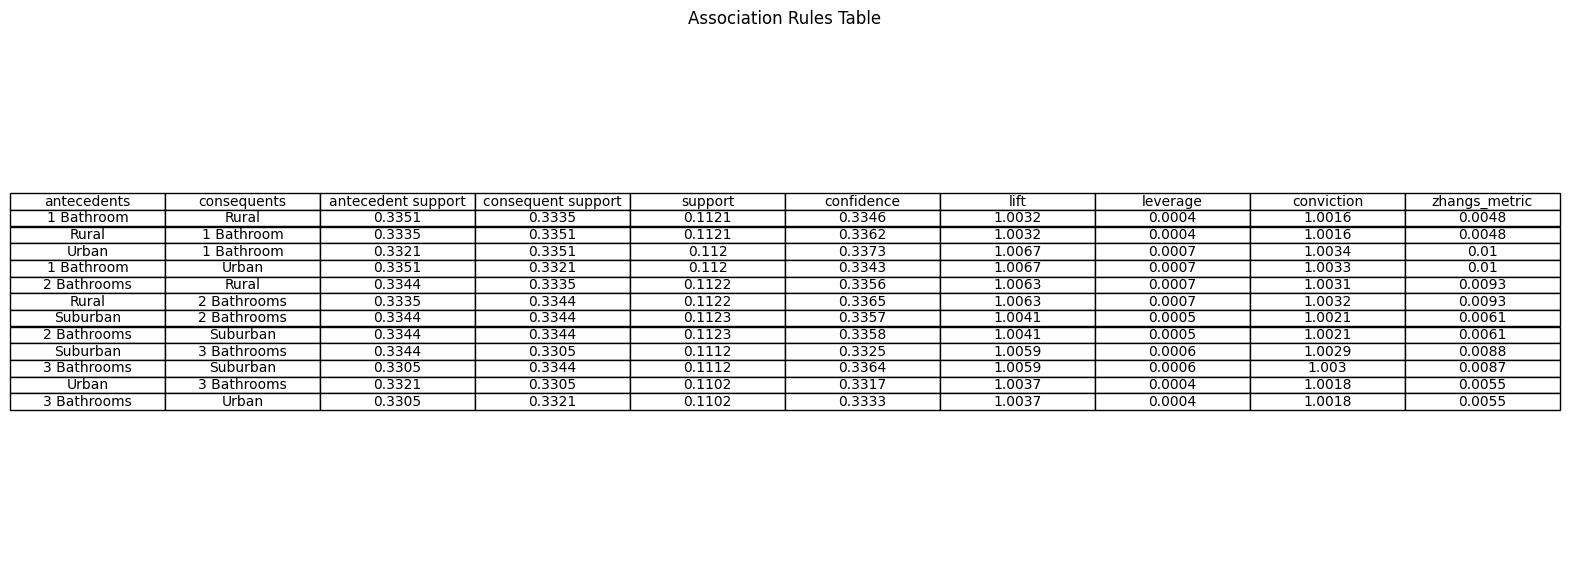

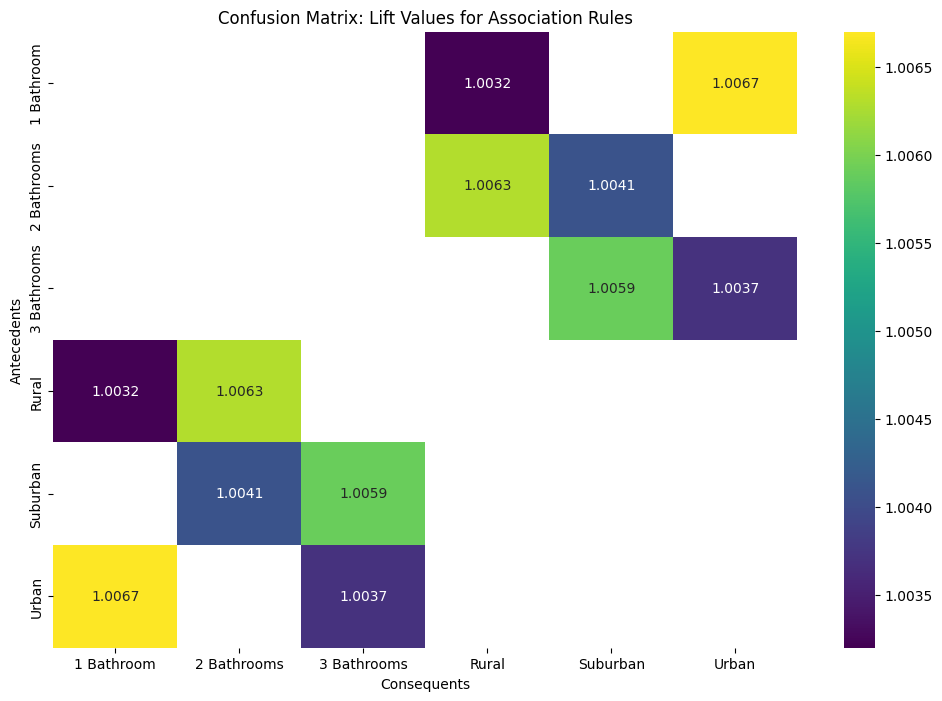

'\n# GRÁFICO GRAFO\nG = nx.DiGraph()\n\n# Adicionar arestas e nós com base nas regras de associação\nfor idx, rule in rules.iterrows():\n    G.add_edge(rule[\'antecedents\'], rule[\'consequents\'], weight=rule[\'lift\'])\n\n# Desenhar o gráfico\nplt.figure(figsize=(12, 8))\npos = nx.spring_layout(G)\nnx.draw(G, pos, with_labels=True, node_color=\'skyblue\', node_size=1200, edge_color=\'gray\', linewidths=1, font_size=15)\nlabels = nx.get_edge_attributes(G, \'weight\')\nnx.draw_networkx_edge_labels(G, pos, edge_labels=labels)\nplt.title(\'Gráfico de Rede de Regras de Associação\')\nplt.xlabel(\'Antecedentes\')\nplt.ylabel(\'Consequentes\')\nplt.show()\n\n# GRÁFICO DE DISPERSÃO\nplt.figure(figsize=(12, 8))\nplt.scatter(rules[\'confidence\'], rules[\'lift\'], s=rules[\'support\']*1000, alpha=0.5)\nplt.xlabel(\'Confiança (Probabilidade da Regra)\')\nplt.ylabel(\'Elevação (Lift) da Regra\')\nplt.title(\'Associação de Regras: Confiança vs. Elevação (Tamanho representa o Suporte)\')\nplt.grid

In [8]:
# Import Libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Import the dataset
ds = pd.read_csv('dataset.csv')

# Display the first 5 rows of the DataFrame
# print(ds.head())

# Convert the DataFrame into a transaction format
transactions = []
for index, row in ds.iterrows():
    transaction = []
    transaction.append(f"Bedrooms_{row['Bedrooms']}")
    transaction.append(f"Bathrooms_{row['Bathrooms']}")
    transaction.append(f"Neighborhood_{row['Neighborhood']}")
    transaction.append(f"Neighborhood_{row['Neighborhood']}")
    transaction.append(f"YearBuilt_{row['YearBuilt']}")
    transaction.append(f"Price_{row['Price']}")
    transactions.append(transaction)

# Use TransactionEncoder to transform transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
ds_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to identify frequent items with a minimum support of 0.11 (adjust as needed)
frequent_itemsets = apriori(ds_transformed, min_support=0.11, use_colnames=True)

# Generate association rules from identified frequent items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Change Labels
def map_labels(label_set):
    if 'Bathrooms_1' in label_set:
        return '1 Bathroom'
    if 'Bathrooms_2' in label_set:
        return '2 Bathrooms'
    if 'Bathrooms_3' in label_set:
        return '3 Bathrooms'
    if 'Neighborhood_Urban' in label_set:
        return 'Urban'
    if 'Neighborhood_Suburb' in label_set:
        return 'Suburban'
    if 'Neighborhood_Rural' in label_set:
        return 'Rural'
    else:
        return ', '.join(label_set)

# Apply the mapping function to convert frozenset labels to the desired string format
rules['antecedents'] = rules['antecedents'].apply(lambda x: map_labels(x))
rules['consequents'] = rules['consequents'].apply(lambda x: map_labels(x))

# Display the rules as a table
rules = rules.round(4)

plt.figure(figsize=(20, 7))
table = plt.table(cellText=rules.values,
                  colLabels=rules.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.axis('off')
plt.title('Association Rules Table')
plt.show()

# Heatmap Graph
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis', cbar=True)
plt.title('Confusion Matrix: Lift Values for Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

## Results Interpretation

From the derived association rules, it's evident that the number of bathrooms in a residence has a discernible relationship with the type of neighborhood:

Homes equipped with three bathrooms (Bathrooms_3) predominantly align with rural settings (Neighborhood_Rural). Conversely, residences featuring a single bathroom (Bathrooms_1) are more commonly associated with both suburban (Neighborhood_Suburb) and urban (Neighborhood_Urban) locales.

This trend could be attributed to certain inherent characteristics of urban and rural areas. Specifically, urban areas often face space constraints, leading to the construction of smaller homes with fewer bathrooms. In contrast, rural environments typically offer more expansive land, allowing for the development of larger homes with multiple bathrooms. Thus, the observed associations in the dataset illuminate a plausible correlation between the spatial constraints of urbanization and the bathroom count in residences.

## Conclusion

This assignment embarked on a comprehensive exploration of housing data, specifically focusing on the association between the number of bathrooms in a residence and its corresponding neighborhood type. Through the application of association rule mining techniques, intriguing patterns emerged that shed light on the interplay between urbanization levels and housing characteristics.

Our findings underscored a distinct correlation: residences boasting a higher count of bathrooms, notably three bathrooms, are predominantly situated within rural settings. In contrast, homes with fewer bathrooms, such as those with a single bathroom, lean towards suburban and urban environments. This pattern suggests more than mere coincidence, hinting at underlying factors like spatial constraints in urban areas versus expansive land availability in rural locales.

Furthermore, our interpretation delved deeper into the rationale behind these patterns, considering the inherent characteristics of urban and rural regions. The limited space in urban settings necessitates the construction of smaller residences, thereby affecting the bathroom count. Conversely, rural areas, characterized by more significant expanses of land, facilitate the creation of more spacious homes with multiple bathrooms.

In essence, this assignment not only provided insights into the housing dynamics but also illuminated the intricate relationships between urbanization, housing size, and amenities. As urbanization continues to shape our living spaces, understanding these nuanced associations becomes paramount for policymakers, urban planners, and real estate professionals alike.

## Repository 

https://github.com/a18851/IA_G09/

## References

https://saiconference.com/IntelliSys

http://aima.cs.berkeley.edu/

https://github.com/aimacode

